#442 final project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
import os, imageio
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms.functional as TF
from torchsummary import summary
from torch.utils.data import Dataset, Subset, DataLoader, random_split, TensorDataset
import sklearn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")

First we need to import necessary files for running kNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

Here, we are going to get all possible file paths to our data.

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from google.colab.patches import cv2_imshow

folder_path_1 = '/content/drive/MyDrive/extract_v2/extract_train_3'
folder_path_2 = '/content/drive/MyDrive/extract_v2/extract_test_3'
folder_path_3 = '/content/drive/MyDrive/extract_v2/extract_val_3'

folder_files_1 = {}  # Dictionary to store folder names and corresponding file paths
folder_files_2 = {}
folder_files_3 = {}
# Populate dictionary with file paths and labels
for folder_name in os.listdir(folder_path_1):
    subfolder_path = os.path.join(folder_path_1, folder_name)
    for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        folder_files_1[file_path] = folder_name
for folder_name in os.listdir(folder_path_2):
    subfolder_path = os.path.join(folder_path_2, folder_name)
    for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        folder_files_2[file_path] = folder_name
for folder_name in os.listdir(folder_path_3):
    subfolder_path = os.path.join(folder_path_3, folder_name)
    for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        folder_files_3[file_path] = folder_name

# Function to load images and convert them to a consistent format
a = None
def load_images(file_dict):
    images_knn = []
    images_cnn = []
    labels = []
    a = 0
    for file_path, label in tqdm(file_dict.items()):
        # Read image in, resize to (64, 64) and flatten the array
        img = imread(file_path, as_gray=True)
        # img_resized_cnn = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
        img_resized_cnn = img
        img_resized_knn = img_resized_cnn.flatten()
        images_knn.append(img_resized_knn)
        images_cnn.append(img_resized_cnn)
        labels.append(label)
    return np.array(images_knn), np.array(images_cnn), np.array(labels)
# Load images and labels
X_knn_train, X_cnn_train, y_train = load_images(folder_files_1)
X_knn_test, X_cnn_test, y_test = load_images(folder_files_2)
X_knn_val, X_cnn_val, y_val = load_images(folder_files_3)

  0%|          | 0/5803 [00:00<?, ?it/s]

  0%|          | 0/1160 [00:00<?, ?it/s]

  0%|          | 0/1160 [00:00<?, ?it/s]

In [ ]:
print(X_cnn_train.shape)
print(X_cnn_test.shape)
print(X_cnn_val.shape)

(5803, 64, 64)
(1160, 64, 64)
(1160, 64, 64)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, classification_report
import numpy as np

# Initialize lists to store recall, precision, and number of neighbors
recalls = []
precisions = []
neighbors = list(range(1, 20))

# Loop through different values of neighbors
for i in neighbors:
    # X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_knn_train, y_train)
    y_pred = knn.predict(X_knn_test)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recalls.append(recall)
    precisions.append(precision)
    print("Classification Report for", i, "neighbors:\n", classification_report(y_test, y_pred))
    print("Weighted Recall:", recall)
    print("Weighted Precision:", precision)

Classification Report for 1 neighbors:
               precision    recall  f1-score   support

           A       0.58      0.65      0.61        40
           B       0.51      0.55      0.53        40
           C       0.91      0.72      0.81        40
           D       0.70      0.65      0.68        40
           E       0.76      0.65      0.70        40
           F       0.88      0.57      0.70        40
           G       0.85      0.57      0.69        40
           H       0.78      0.72      0.75        40
           I       0.72      0.78      0.75        40
           J       0.74      0.88      0.80        40
           K       0.86      0.80      0.83        40
           L       0.82      0.90      0.86        40
           M       0.73      0.75      0.74        40
           N       0.88      0.72      0.79        40
           O       0.59      0.42      0.49        40
           P       0.85      0.88      0.86        40
           Q       0.83      0.60      0.

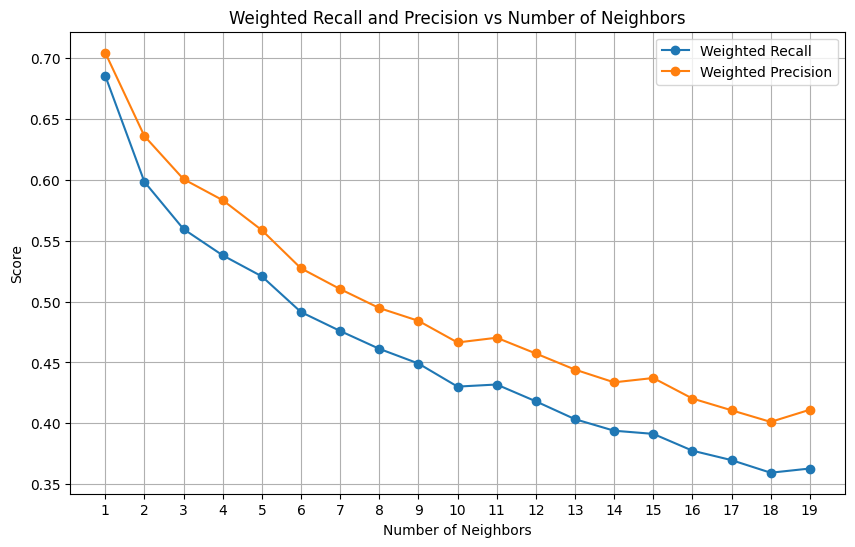

In [ ]:
# Plotting the recall and precision versus number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors, recalls, marker='o', label='Weighted Recall')
plt.plot(neighbors, precisions, marker='o', label='Weighted Precision')
plt.title('Weighted Recall and Precision vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(neighbors)  # Ensure all xticks are displayed
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchsummary import summary

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, padding=1)
        self.fc = nn.Linear(8 * 64 * 64, 29)
        #maximum: .4 on test ste
        # self.conv1 = nn.Conv2d(3, 4, kernel_size=3, padding=1)
        # self.max1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # self.conv2 = nn.Conv2d(4, 8, kernel_size=3, padding=1)
        # self.fc = nn.Linear(8 * 16 * 16, 29)

    def forward(self, x):
        x = self.conv1(x)
        # x = self.max1(x) #added
        x = nn.functional.relu(x)
        x = self.conv2(x)
        # x = self.max1(x) #added
        x = nn.functional.relu(x)
        x = x.reshape(x.size(0), -1)  # Reshape to a flat vector
        x = self.fc(x)
        return x



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Network().to(device)
criterion = nn.CrossEntropyLoss()

print('Your network:')
# Pass the device type as a string
print(summary(model, (3, 64, 64), device=str(device)))
learning_rate, weight_decay, num_epoch = 1e-4, 0.3e-4, 25

Your network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 64, 64]             112
            Conv2d-2            [-1, 8, 64, 64]             296
            Linear-3                   [-1, 29]         950,301
Total params: 950,709
Trainable params: 950,709
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.38
Params size (MB): 3.63
Estimated Total Size (MB): 4.05
----------------------------------------------------------------
None


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_encoded_train = label_encoder.fit_transform(y_train)
y_encoded_test = label_encoder.fit_transform(y_test)
y_encoded_val = label_encoder.fit_transform(y_val)
X_train = torch.tensor(X_cnn_train, dtype=torch.float32)  # Features must be of type float
X_test = torch.tensor(X_cnn_test, dtype=torch.float32)  # Features must be of type float
X_val = torch.tensor(X_cnn_val, dtype=torch.float32)
y_train = torch.tensor(y_encoded_train, dtype=torch.long)  # Labels must be of type long
y_test = torch.tensor(y_encoded_test, dtype=torch.long)  # Labels must be of type long
y_val = torch.tensor(y_encoded_val, dtype=torch.long)  # Labels must be of type long
# Create datasets from tensors
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)
trainloader = DataLoader(train_dataset, batch_size=50, shuffle=True)

testloader = DataLoader(test_dataset, batch_size=50, shuffle=True)
valloader = DataLoader(val_dataset, batch_size = 50, shuffle=True)

# for batch, labels in testloader:
#     print("Batch shape:", batch.shape)  # Print the shape of each batch
#     print("Labels shape:", labels.shape)  # Print the shape of each batch's labels
#     break

# for batch, labels in trainloader:
#     print("Batch shape:", batch.shape)
#     print("Labels shape:", labels.shape)
#     break

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
def train(model, trainloader, valloader, num_epoch=10):  # Train the model
    print("Start training...")
    trn_loss_hist = []
    trn_acc_hist = []
    val_acc_hist = []
    model.train()  # Set the model to training mode
    for i in range(num_epoch):
        running_loss = []
        running_corrects = 0  # Initialize counter for correct predictions
        total_samples = 0

        print('-----------------Epoch = %d-----------------' % (i+1))
        for batch, label in tqdm(trainloader):
            batch = batch.to(device)
            label = label.to(device)
            optimizer.zero_grad()  # Clear gradients from the previous iteration

            # Ensure batch has the correct shape and type
            batch = batch.permute(0, 3, 1, 2).float()
            batch = batch.reshape(-1, 3, 64, 64)

            pred = model(batch)

            # Calculate the loss and perform backpropagation
            loss = criterion(pred, label)
            running_loss.append(loss.item())
            loss.backward()
            optimizer.step()


            # Calculate training accuracy
            _, preds = torch.max(pred, 1)
            running_corrects += torch.sum(preds == label.data)
            # print(label.size(0))
            total_samples += label.size(0)

        epoch_acc = running_corrects / total_samples  # Compute epoch accuracy
        trn_acc_hist.append(epoch_acc)  # Append epoch accuracy to list

        epoch_loss = np.mean(running_loss)
        trn_loss_hist.append(epoch_loss)
        val = evaluate(model,trainloader)
        trn_acc_hist.append(val)
        print("\n Evaluation accuracy on training set: {}".format(val))
        val = evaluate(model,valloader)
        val_acc_hist.append(val)
        print("\n Evaluation accuracy on validation set: {}".format(val))
        print("\n Epoch {} loss: {}, accuracy: {}".format(i+1, epoch_loss, epoch_acc))

    print("Training Done!")
    return trn_loss_hist, trn_acc_hist, val_acc_hist


def evaluate(model, loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch, label in tqdm(loader):
            # print("batch shape: ", batch.shape)
            batch = batch.to(device)
            label = label.to(device)

            batch = batch.permute(0, 3, 1, 2).float()  # Change channel position and ensure float type
            batch = batch.reshape(-1, 3, 64, 64)

            pred = model(batch)
            # print("Predictions shape:", pred.shape)
            correct += (torch.argmax(pred, dim=1) == label).sum().item()


    acc = correct / len(loader.dataset)
    # print("\n Evaluation accuracy: {}".format(acc))
    return acc


trn_loss_hist, trn_acc_hist, val_acc_hist = train(model, trainloader, valloader,
                                                   num_epoch)

##############################################################################
# TODO: Note down the evaluation accuracy on test set                        #
##############################################################################
print("\n Evaluate on test set")
evaluate(model, testloader)

Start training...
-----------------Epoch = 1-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.28278476650008616


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.1724137931034483

 Epoch 1 loss: 8.483216365687868, accuracy: 0.14716525375843048
-----------------Epoch = 2-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.622781320006893


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.38189655172413794

 Epoch 2 loss: 1.9763034262145176, accuracy: 0.4544201195240021
-----------------Epoch = 3-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.7851111494054799


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.39827586206896554

 Epoch 3 loss: 1.083019993116713, accuracy: 0.6853351593017578
-----------------Epoch = 4-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.8709288299155609


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.47413793103448276

 Epoch 4 loss: 0.609897045752941, accuracy: 0.8292262554168701
-----------------Epoch = 5-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9164225400654834


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.47758620689655173

 Epoch 5 loss: 0.514872070433747, accuracy: 0.8645527958869934
-----------------Epoch = 6-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9636394968119938


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5146551724137931

 Epoch 6 loss: 0.29356353373354316, accuracy: 0.9265896677970886
-----------------Epoch = 7-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9782870928829915


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5232758620689655

 Epoch 7 loss: 0.15581091130391145, accuracy: 0.9703601002693176
-----------------Epoch = 8-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9803549887988972


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5206896551724138

 Epoch 8 loss: 0.09593139996584983, accuracy: 0.9851800203323364
-----------------Epoch = 9-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9925900396346717


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5275862068965518

 Epoch 9 loss: 0.07139395119853191, accuracy: 0.9894881844520569
-----------------Epoch = 10-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9919007409960365


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5370689655172414

 Epoch 10 loss: 0.048732758770322696, accuracy: 0.9953472018241882
-----------------Epoch = 11-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.999138376701706


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5456896551724137

 Epoch 11 loss: 0.05485764664048568, accuracy: 0.9908667802810669
-----------------Epoch = 12-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9974151301051181


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5456896551724137

 Epoch 12 loss: 0.04383583890640328, accuracy: 0.9931069612503052
-----------------Epoch = 13-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.999138376701706


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5344827586206896

 Epoch 13 loss: 0.03183148850678888, accuracy: 0.9950025677680969
-----------------Epoch = 14-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9989660520420472


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5353448275862069

 Epoch 14 loss: 0.0256318162736666, accuracy: 0.9965534806251526
-----------------Epoch = 15-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9879372738238842


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5336206896551724

 Epoch 15 loss: 0.0241390203531736, accuracy: 0.9965534806251526
-----------------Epoch = 16-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 1.0


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5422413793103448

 Epoch 16 loss: 0.027390582204406332, accuracy: 0.9955195188522339
-----------------Epoch = 17-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 1.0


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.55

 Epoch 17 loss: 0.009959959932483541, accuracy: 0.9999999403953552
-----------------Epoch = 18-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.987247975185249


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5258620689655172

 Epoch 18 loss: 0.022621052586433724, accuracy: 0.9955195188522339
-----------------Epoch = 19-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9886265724625194


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5267241379310345

 Epoch 19 loss: 0.05183346846745883, accuracy: 0.9879372119903564
-----------------Epoch = 20-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9670859900051697


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5232758620689655

 Epoch 20 loss: 0.1313833066652346, accuracy: 0.9679476022720337
-----------------Epoch = 21-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9682922626227813


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.503448275862069

 Epoch 21 loss: 0.21098061345326594, accuracy: 0.9458900094032288
-----------------Epoch = 22-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.986386351886955


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5077586206896552

 Epoch 22 loss: 0.12595680388462785, accuracy: 0.9684645533561707
-----------------Epoch = 23-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 0.9967258314664829


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.525

 Epoch 23 loss: 0.03592321808792205, accuracy: 0.9922453761100769
-----------------Epoch = 24-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 1.0


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5362068965517242

 Epoch 24 loss: 0.016044529950205156, accuracy: 0.9982767105102539
-----------------Epoch = 25-----------------


  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]


 Evaluation accuracy on training set: 1.0


  0%|          | 0/24 [00:00<?, ?it/s]


 Evaluation accuracy on validation set: 0.5482758620689655

 Epoch 25 loss: 0.00481598011444872, accuracy: 0.9999999403953552
Training Done!

 Evaluate on test set


  0%|          | 0/24 [00:00<?, ?it/s]

0.6189655172413793

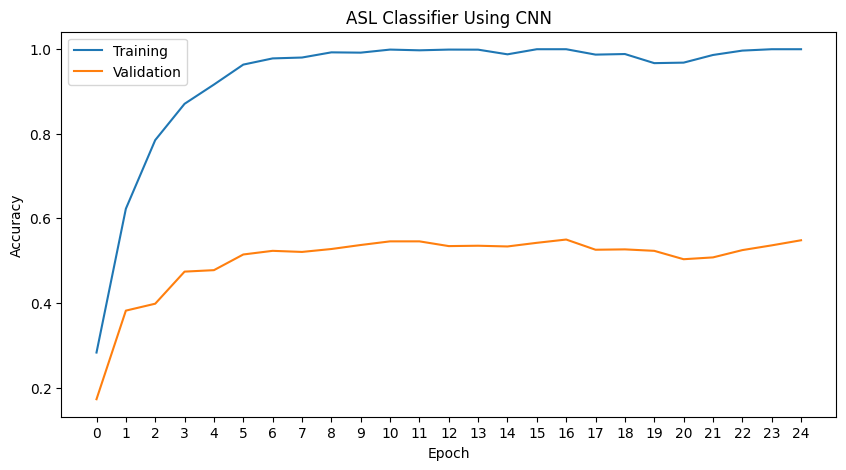

In [ ]:
x = np.arange(num_epoch)
plt.figure()
plt.plot(x,trn_acc_hist[1::2])
plt.plot(x,val_acc_hist)
plt.legend(['Training',
            'Validation'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ASL Classifier Using CNN')
plt.gcf().set_size_inches(10,5)
plt.savefig('part1.png',dpi=300)
plt.show()